Create a treasure hunt game where a user has to figure out the location of the treasure on a grid by using just the commands of E, W, N, and S, indicating East, West, North, and South, respectively. 

REQUIREMENTS:
1. Define the size of the grid. It could be any number, but start from 5
2. Assign the player a random position on the map. Do the same for the location of the treasure. (HINT: use randint() to generate a random set of coordinates)
    2.1. Since it's 2-dimensional grid, the location of both the player and the treasure will be coordinates, like (x,y)
3. Decide the maximum moves the player can make and keep track of the number of moves.
4. Calculate the initial distance between the player and the treasure location
5. Allow player to make as many moves as maximum moves allowed
    5.1. Depending on which direction the player moves (N, S, E, or W), recalculate player's position and their distance from the treasure location
    5.2. If the move brings player closer to the treasure, let the user know that they are getting closer
    5.3. If the move takes player away from the treasure, let the user know that they are moving farther
    5.4. If the player makes an illegal move, then let the user know that that move is not allowed. 
    5.5. If the new player position is the same as the treasure position, let the user know that they have found the treasure
    5.6. If the moves made by the player are the same as maximum moves allowed, let the user know that no more moves are possible and that they have lost the game. Also show them where the treasure was located.
    5.7. If there are still moves left, then the game should continue and keep asking the user for their moves. 


Initial distance from treasure: 2.00


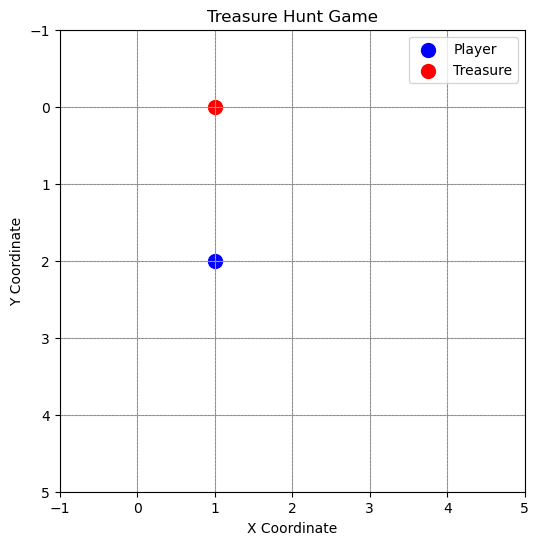

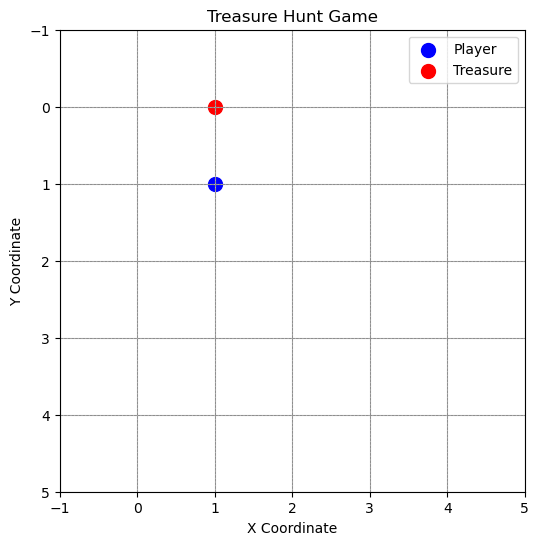

You are getting closer to the treasure.
Moves remaining: 9


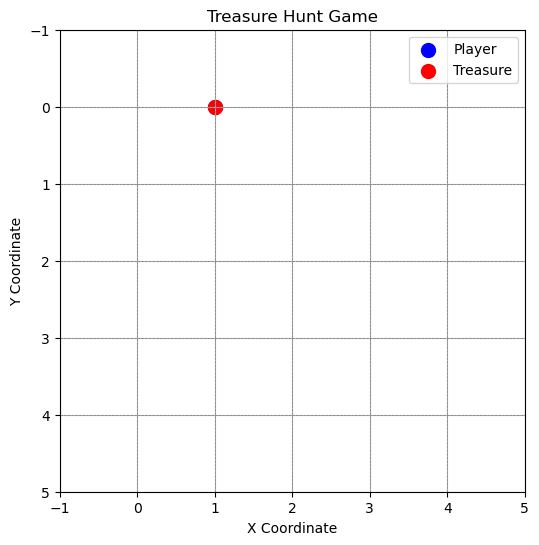

Congratulations! You've found the treasure at [1, 0]!


In [1]:
import random
import math
import matplotlib.pyplot as plt

# Step 1: Define the size of the grid
grid_size = 5

# Step 2: Assign the player and treasure random positions
player_position = [random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)]
treasure_position = [random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)]

# Step 3: Define the maximum moves and initialize the move count
max_moves = 10
move_count = 0

# Step 4: Function to calculate distance between two positions
def calculate_distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)

# Calculate initial distance
initial_distance = calculate_distance(player_position, treasure_position)
print(f"Initial distance from treasure: {initial_distance:.2f}")

# Function to plot the grid and positions
def plot_grid(player_pos, treasure_pos):
    plt.figure(figsize=(6, 6))
    plt.xlim(-1, grid_size)
    plt.ylim(-1, grid_size)
    plt.grid(True)
    
    # Plot grid lines
    for i in range(grid_size):
        plt.axhline(i, color='gray', linestyle='--', linewidth=0.5)
        plt.axvline(i, color='gray', linestyle='--', linewidth=0.5)
    
    # Plot the player and treasure
    plt.scatter(*player_pos, color='blue', label='Player', s=100)
    plt.scatter(*treasure_pos, color='red', label='Treasure', s=100)
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Treasure Hunt Game')
    plt.legend()
    plt.gca().invert_yaxis()  # Invert Y axis to have (0,0) in the top-left corner
    plt.show()

# Initial plot
plot_grid(player_position, treasure_position)

# Game loop
while move_count < max_moves:
    # Get player move
    move = input("Enter your move (N, S, E, W): ").upper()
    
    # Save the player's previous position
    previous_position = player_position.copy()
    
    # Process the move
    if move == 'N':
        if player_position[1] > 0:
            player_position[1] -= 1
        else:
            print("Move not allowed. Out of bounds!")
            continue
    elif move == 'S':
        if player_position[1] < grid_size - 1:
            player_position[1] += 1
        else:
            print("Move not allowed. Out of bounds!")
            continue
    elif move == 'E':
        if player_position[0] < grid_size - 1:
            player_position[0] += 1
        else:
            print("Move not allowed. Out of bounds!")
            continue
    elif move == 'W':
        if player_position[0] > 0:
            player_position[0] -= 1
        else:
            print("Move not allowed. Out of bounds!")
            continue
    else:
        print("Invalid move. Use N, S, E, or W.")
        continue
    
    # Increase the move count
    move_count += 1
    
    # Calculate new distance from the treasure
    new_distance = calculate_distance(player_position, treasure_position)
    
    # Plot updated positions
    plot_grid(player_position, treasure_position)
    
    # Check if the player found the treasure
    if player_position == treasure_position:
        print(f"Congratulations! You've found the treasure at {player_position}!")
        break
    
    # Provide feedback on the move
    if new_distance < initial_distance:
        print("You are getting closer to the treasure.")
    else:
        print("You are moving farther from the treasure.")
    
    # Update initial distance
    initial_distance = new_distance
    
    # Show remaining moves
    remaining_moves = max_moves - move_count
    if remaining_moves > 0:
        print(f"Moves remaining: {remaining_moves}")
    else:
        print(f"No more moves left. The treasure was at {treasure_position}. Better luck next time!")

